# Mentoria 

### Hito 1 - Práctico de análisis y visualización

In [1]:
import pandas as pd
import csv
import seaborn as sn
import matplotlib.pyplot as plt

#!pip install python-decouple
#from decouple import config
from sqlalchemy import create_engine, text

sn.set_context('talk')

Se leen los archivos `.csv`

In [2]:
df_2019 = pd.read_csv("dataset\DataSet2019.csv", sep=';')
df_2020 = pd.read_csv("dataset\DataSet2020.csv",sep=';')
df_2021 = pd.read_csv("dataset\DataSet2021.csv",sep=';')
df_2022 = pd.read_csv("dataset\DataSet2022.csv",sep=';')
df_Montos = pd.read_csv("dataset\DataSetMontos.csv",sep=';')

Definimos las columnas de los dataset

**DataSet20XX.csv**  

`seg_id`		= Id Interno del seguimiento  
`prs_id`		= Id Interno de la persona  
`seg_codigo`	= Id Interno de la acción realizada  
`hora`		    = Fecha y Hora de la acción  
`seg_usuario`   = Usuario que realizo la acción  
`obn_acreedor`	= Id Interno del acreedor  
`obn_interno`	= Id Interno de la obligación  
`obn_producto`	= Id Interno de tipo de producto  
`obn_cabecera`	= Id Interno de Asignación --> Cartera de clientes   
`fecha_alta`	= Fecha de Ingreso de la obligación  
`obn_estudio`	= Id Interno del estudio asignado  
`estado` 	    = Estado de la obligación  


**DataSetMontos.csv**  

`obn_id`		= Id Interno de la obligación  
`monto_deuda`	= Importe de deuda original  

Observamos los dataframes.

#### DataFrame 2019

In [3]:
df_2019.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado                                      19605115',
       '794514', '9', '08/10/2019 10:59:00', '330', '264', '1445961', '1',
       '9275', '24/09/2019', '940', 'B                       '],
      dtype='object')

Vemos que hay mas columnas de las mencionadas anteriormente. Se revisan las columnas en cuestion.

In [4]:
df_2019.dtypes
df_2019[:5]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,...,9,08/10/2019 10:59:00,330,264,1445961,1,9275,24/09/2019,940,B
0,19605119,787994,323,08/10/2019 11:00:00,341,269,1438679,102,9269,23/09/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19605121,771970,326,08/10/2019 11:00:00,313,264,1411199,1,9243,23/08/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19605122,771866,33,08/10/2019 11:00:00,349,264,1411092,1,9243,23/08/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19605123,772097,323,08/10/2019 11:00:00,362,264,1411333,1,9243,23/08/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19605130,793962,323,08/10/2019 11:00:00,407,266,1445070,2,9272,24/09/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2019.describe().round(2)

,seg_id,prs_id,seg_codigo,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,obn_estudio,794514,9,08/10/2019 10:59:00,330,264,1445961,1,9275,24/09/2019,940,B
count,1066261.00,1066261.00,1066261.00,1066261.00,1066261.00,1066261.0,1066261.00,1066261.00,1066261.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,18439712.81,753286.30,252.94,317.43,265.05,1399858.4,9.49,9163.24,973.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1858286.50,61517.55,123.59,81.17,1.81,36395.3,26.31,102.98,66.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15120414.00,74678.00,1.00,88.00,264.00,1354293.0,1.00,9002.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,16803356.00,747887.00,223.00,228.00,264.00,1374773.0,1.00,9079.00,940.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,18301453.00,753868.00,323.00,335.00,264.00,1392037.0,1.00,9174.00,940.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19975867.00,772180.00,326.00,377.00,266.00,1412884.0,2.00,9247.00,1041.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,32870430.00,835300.00,387.00,461.00,272.00,1511833.0,102.00,9395.00,1339.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2019.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,...,9,08/10/2019 10:59:00,330,264,1445961,1,9275,24/09/2019,940,B
1066256,32870425,701629,323,26/12/2019 09:01:43,294,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066257,32870426,701629,323,26/12/2019 09:01:43,294,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066258,32870427,701629,323,26/12/2019 09:01:44,294,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066259,32870429,701629,361,29/12/2019 09:01:44,206,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066260,32870430,701629,379,29/12/2019 09:01:44,206,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observan que tienen valores nulos. Se definen entonces las columnas del dataset y se renombra la columna estado.

In [7]:
columns = ['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado' ]

df_2019.rename(columns= {'estado                                      19605115':'estado'}, inplace=True)
df_2019 = df_2019[columns]
df_2019.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
1066256,32870425,701629,323,26/12/2019 09:01:43,294,270,1459936,6,9323,28/10/2019,1112,C
1066257,32870426,701629,323,26/12/2019 09:01:43,294,270,1459936,6,9323,28/10/2019,1112,C
1066258,32870427,701629,323,26/12/2019 09:01:44,294,270,1459936,6,9323,28/10/2019,1112,C
1066259,32870429,701629,361,29/12/2019 09:01:44,206,270,1459936,6,9323,28/10/2019,1112,C
1066260,32870430,701629,379,29/12/2019 09:01:44,206,270,1459936,6,9323,28/10/2019,1112,C


#### DataFrame 2020

In [8]:
df_2020.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado                                      21945454',
       '839807', '326', '17/01/2020 15:45:51', '446', '269', '1522781', '1',
       '9437', '16/01/2020', '1192', 'B                    '],
      dtype='object')

In [9]:
df_2020.dtypes

seg_id                                                    int64
prs_id                                                    int64
seg_codigo                                                int64
hora                                                     object
seg_usuario                                               int64
obn_acreedor                                              int64
obn_interno                                               int64
obn_producto                                              int64
obn_cabecera                                              int64
fecha_alta                                               object
obn_estudio                                               int64
estado                                      21945454     object
839807                                                  float64
326                                                     float64
17/01/2020 15:45:51                                     float64
446                                     

In [10]:
df_2020.describe().round(2)

,seg_id,prs_id,seg_codigo,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,obn_estudio,839807,326,17/01/2020 15:45:51,446,269,1522781,1,9437,16/01/2020,1192,B
count,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,24977580.55,825488.84,231.37,322.85,263.72,1527683.94,9.06,9465.17,1022.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1856643.00,92169.74,136.92,96.52,23.49,67763.39,25.09,160.48,99.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,21594291.00,74125.00,2.00,147.00,36.00,1058479.00,1.00,7433.00,231.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,23437216.25,794568.00,53.00,219.00,264.00,1488102.00,1.00,9364.00,940.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,25055828.00,844559.00,323.00,340.00,264.00,1540734.00,1.00,9487.00,1040.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,26464039.75,876764.00,332.00,410.00,269.00,1579087.00,4.00,9586.00,1092.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,32870853.00,921015.00,390.00,494.00,272.00,1638182.00,103.00,9785.00,1339.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_2020.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,...,326,17/01/2020 15:45:51,446,269,1522781,1,9437,16/01/2020,1192,B
1669585,32870811,701629,323,30/11/2020 09:03:27,374,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669586,32870812,701629,323,30/11/2020 09:03:27,374,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669587,32870813,701629,323,30/11/2020 09:03:27,374,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669588,32870815,701629,361,01/12/2020 09:03:28,206,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669589,32870816,701629,379,01/12/2020 09:03:28,206,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observa el mismo problema que en el `df_2019`. Renombramos de igual manera y dejamos solo las columnas pertinentes

In [12]:
df_2020.rename(columns= {'estado                                      21945454':'estado'}, inplace=True)
df_2020 = df_2020[columns]
df_2020[:5]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
0,21945483,821495,326,17/01/2020 15:48:52,432,264,1488333,1,9364,23/11/2019,940,B
1,21945484,835147,326,17/01/2020 15:48:58,322,264,1511676,1,9395,26/12/2019,940,B
2,21945486,821495,326,17/01/2020 15:49:03,432,264,1488333,1,9364,23/11/2019,940,B
3,21945496,801521,326,17/01/2020 15:49:46,439,264,1456453,1,9321,25/10/2019,1040,C
4,21945512,801615,326,17/01/2020 15:51:12,426,264,1456550,1,9321,25/10/2019,1041,B


#### DataFrame 2021

In [13]:
df_2021.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado                                      37470164',
       '971009', '326', '06/10/2021 16:43:14', '531', '269', '1708410', '1',
       '10069', '06/09/2021', '1192', 'B                   '],
      dtype='object')

In [14]:
df_2021.dtypes

seg_id                                                    int64
prs_id                                                    int64
seg_codigo                                                int64
hora                                                     object
seg_usuario                                               int64
obn_acreedor                                              int64
obn_interno                                               int64
obn_producto                                              int64
obn_cabecera                                              int64
fecha_alta                                               object
obn_estudio                                               int64
estado                                      37470164     object
971009                                                  float64
326                                                     float64
06/10/2021 16:43:14                                     float64
531                                     

In [15]:
df_2021.describe().round(2)

,seg_id,prs_id,seg_codigo,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,obn_estudio,971009,326,06/10/2021 16:43:14,531,269,1708410,1,10069,06/09/2021,1192,B
count,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,34010977.66,853944.52,292.93,320.32,267.79,1602998.07,21.93,9719.82,1092.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3530458.55,141619.31,128.64,99.61,2.66,97786.52,39.12,296.87,120.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,28326644.00,74143.00,0.00,147.00,36.00,1045862.00,1.00,6967.00,312.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,30779961.50,805387.00,323.00,248.00,264.00,1479767.00,1.00,9326.00,1037.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,34102258.00,914541.00,361.00,248.00,269.00,1640631.00,2.00,9797.00,1093.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37046509.50,947927.00,379.00,408.00,270.00,1681809.50,6.00,9967.00,1112.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,40896777.00,998465.00,399.00,540.00,277.00,1755580.00,103.00,10212.00,1397.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_2021.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,...,326,06/10/2021 16:43:14,531,269,1708410,1,10069,06/09/2021,1192,B
2660282,40531607,960516,398,06/01/2022 11:40:23,325,264,1694005,1,10019,23/07/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660283,40531608,967182,398,06/01/2022 11:40:23,325,264,1703162,1,10052,24/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660284,40531534,945607,398,06/01/2022 11:39:56,325,264,1672915,1,9952,21/05/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660285,40531535,956089,398,06/01/2022 11:39:56,325,264,1686276,1,9982,24/06/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660286,40531609,966607,398,06/01/2022 11:40:23,325,264,1702568,1,10052,24/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nuevamente el mismo problema que para los dataframe `df_2019` y `df_2020`.

In [17]:
df_2021.rename(columns= {'estado                                      37470164':'estado'}, inplace=True)
df_2021 = df_2021[columns]
df_2021[:5]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
0,37294976,967387,326,04/10/2021 15:22:28,493,264,1703372,1,10052,24/08/2021,940,B
1,37295062,945690,323,04/10/2021 15:28:39,455,264,1673000,1,9952,21/05/2021,1040,B
2,37295071,831888,326,04/10/2021 15:29:22,369,271,1504791,2,9386,11/12/2019,1092,A
3,37295102,975954,323,04/10/2021 15:31:14,175,264,1715481,1,10084,24/09/2021,940,B
4,37295114,967387,326,04/10/2021 15:31:59,493,264,1703372,1,10052,24/08/2021,940,B


#### DataFrame 2022

In [18]:
df_2022.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado '],
      dtype='object')

In [19]:
df_2022.dtypes

seg_id           int64
prs_id           int64
seg_codigo       int64
hora            object
seg_usuario      int64
obn_acreedor     int64
obn_interno      int64
obn_producto     int64
obn_cabecera     int64
fecha_alta      object
obn_estudio      int64
estado          object
dtype: object

In [20]:
df_2022.describe().round(2)

,seg_id,prs_id,seg_codigo,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,obn_estudio
count,532746.00,532746.00,532746.00,532746.00,532746.00,532746.00,532746.00,532746.00,532746.00
mean,41881971.77,909675.00,299.12,330.12,268.00,1681141.62,23.97,9968.64,1070.51
std,782437.10,147266.42,113.43,107.85,3.81,134028.82,41.10,396.58,144.93
min,40398847.00,75843.00,2.00,147.00,36.00,1151375.00,1.00,8268.00,312.00
25%,41154449.25,809644.00,320.00,248.00,264.00,1508087.75,1.00,9386.00,940.00
50%,41923431.50,984768.00,326.00,248.00,269.00,1739352.00,2.00,10176.00,1092.00
75%,42544126.75,1004547.00,379.00,414.00,270.00,1766284.00,6.00,10251.00,1112.00
max,43584013.00,1032616.00,399.00,577.00,277.00,1833294.00,106.00,10361.00,1397.00


In [21]:
df_2022.rename(columns= {'estado ':'estado'}, inplace=True)
df_2022.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
532741,43222824,1031221,323,31/03/2022 12:42:21,403,264,1831107,1,10348,23/03/2022,901,L
532742,43222837,1009669,323,31/03/2022 12:43:18,556,269,1784296,1,10279,09/02/2022,1192,A
532743,43222838,1031221,320,31/03/2022 12:43:23,403,264,1831107,1,10348,23/03/2022,901,L
532744,43222897,1004646,8,31/03/2022 12:46:40,541,264,1766080,1,10251,21/01/2022,911,A
532745,43222951,1006763,323,31/03/2022 12:49:12,427,266,1770062,4,10267,03/02/2022,896,A


#### DataFrame Montos

In [22]:
df_Montos.columns

Index(['obn_id', 'monto_deuda'], dtype='object')

In [23]:
df_Montos.dtypes

obn_id          int64
monto_deuda    object
dtype: object

In [24]:
#df_Montos['monto_deuda'] = pd.to_numeric(df_Montos['monto_deuda'], errors = 'raise')
#df_Montos.dtypes

In [25]:
df_Montos.describe().round(2)

,obn_id
count,234363.00
mean,1590987.62
std,128260.65
min,1354293.00
25%,1475951.50
50%,1583375.00
75%,1691384.50
max,1839706.00


In [26]:
df_Montos[:5]

,obn_id,monto_deuda
0,1389386,"45022,85"
1,1389387,"58317,55"
2,1389388,"24582,6"
3,1389389,"146845,27"
4,1389390,"59499,16"


#### Dataframe Periodo 2019-2022
Concatenamos los dataframe por año en uno solo para poder analizar los distintos tipos de datos a un nivel mas general

In [27]:
df_years = [df_2019,
            df_2020,
            df_2021,
            df_2022]

#Uno los dataframes por año
df_2019_2022 = pd.DataFrame()
for df in df_years:
    df_2019_2022 = pd.concat([df_2019_2022,df])

In [28]:
df_2019_2022.describe().round(2)

df_2019_2022.head(10)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
0,19605119,787994,323,08/10/2019 11:00:00,341,269,1438679,102,9269,23/09/2019,1111,B
1,19605121,771970,326,08/10/2019 11:00:00,313,264,1411199,1,9243,23/08/2019,1041,B
2,19605122,771866,33,08/10/2019 11:00:00,349,264,1411092,1,9243,23/08/2019,940,B
3,19605123,772097,323,08/10/2019 11:00:00,362,264,1411333,1,9243,23/08/2019,940,B
4,19605130,793962,323,08/10/2019 11:00:00,407,266,1445070,2,9272,24/09/2019,896,B
5,19605133,771970,326,08/10/2019 11:01:00,313,264,1411199,1,9243,23/08/2019,1041,B
6,19605134,759727,323,08/10/2019 11:01:00,399,264,1392482,1,9174,24/06/2019,940,B
7,19605137,766244,323,08/10/2019 11:01:00,422,264,1402275,1,9208,24/07/2019,940,B
8,19605138,792637,323,08/10/2019 11:01:00,434,269,1443522,102,9269,23/09/2019,1093,B
9,19605140,771970,326,08/10/2019 11:01:00,313,264,1411199,1,9243,23/08/2019,1041,B


In [29]:
#Creo tabla SQL con los datos de todos los años
#engine = create_engine('sqlite:///datosPeriodo.sqlite3')
#df_2019_2022.to_sql('datosPeriodo', con=engine, if_exists="replace")

In [30]:
df = pd.merge(df_2019_2022, df_Montos,left_on='obn_interno', right_on='obn_id')
df[:5]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda
0,19605119,787994,323,08/10/2019 11:00:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"
1,19605188,787994,8,08/10/2019 11:04:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"
2,19605113,787994,323,08/10/2019 10:59:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"
3,19734817,787994,330,12/10/2019 11:05:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"
4,19879460,787994,13,17/10/2019 10:56:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"


Se observa por los descriptivos de los dataframes que la mayoria de variables son numericas. Esto no es cierto ya que en realidad son identificadores, aunque sean numeros operan como variables categoricas.

Con esto en mente procedemos a hacer el analisis requerido.

# 1 Top 10: Maximas y minimas cantidades de tipo de gestion.

<Figure size 3600x3600 with 0 Axes>

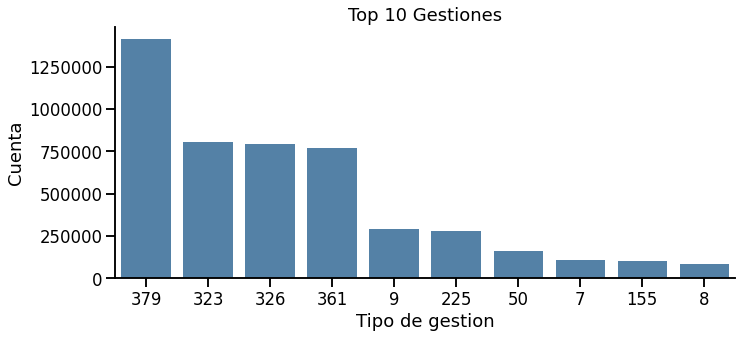

In [31]:
#Filtramos la 10 gestiones
top_10_gestiones = df_2019_2022.seg_codigo\
    .value_counts()\
    .sort_values(ascending = False)\
    .head(10)\
    .reset_index()\
    .rename(columns= {'index':'seg_codigo','seg_codigo':'count'})

#Grafico Top 10 maximas cantidades de tipo de gestion
plt.figure(figsize=(50,50))
sn.catplot(x='seg_codigo', y='count', hue=None, data=top_10_gestiones,\
           kind='bar', height = 5, aspect = 2, order=top_10_gestiones['seg_codigo'], color='steelblue')
plt.title('Top 10 Gestiones')
plt.xlabel('Tipo de gestion')
plt.ylabel('Cuenta')
plt.ticklabel_format(axis="y", style="plain")


#top_10_gestiones

,seg_codigo,count
0,368,1049
1,127,1073
2,346,1148
3,397,1260
4,317,1336
5,385,1364
6,364,1419
7,335,1598
8,396,1601
9,199,1809


<Figure size 3600x3600 with 0 Axes>

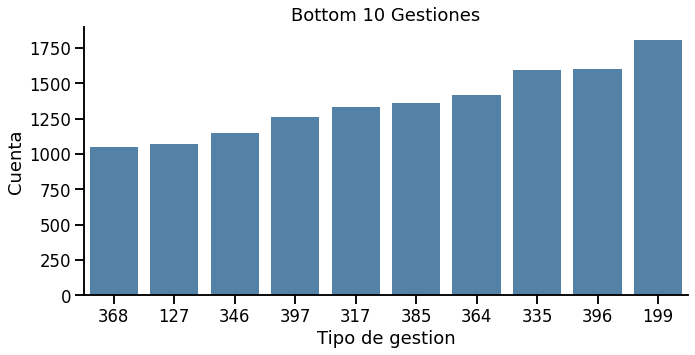

In [32]:
df_2019_2022['seg_count_codigo'] = df_2019_2022['seg_codigo'].map(df_2019_2022['seg_codigo'].value_counts())

#Filtramos gestiones que se hayan hecho menos de mil veces
df_filtered_gestion = df_2019_2022[df_2019_2022['seg_count_codigo']>1000]
#Consideramos las ultimas 10 gestiones que se hayan realizado como minimo 1000 veces
bottom_10_gestiones = df_filtered_gestion.seg_codigo\
    .value_counts()\
    .sort_values(ascending = True)\
    .head(10)\
    .reset_index()\
    .rename(columns= {'index':'seg_codigo','seg_codigo':'count'})

#Grafico bottom 10 minimas gestiones realizadas
plt.figure(figsize=(50,50))
sn.catplot(x='seg_codigo', y='count', hue=None, data=bottom_10_gestiones,\
           kind='bar', height = 5, aspect = 2, order=bottom_10_gestiones['seg_codigo'], color='steelblue')
plt.title('Bottom 10 Gestiones')
plt.xlabel('Tipo de gestion')
plt.ylabel('Cuenta')
plt.ticklabel_format(axis="y", style="plain")

bottom_10_gestiones

#Hacer grafico

# 2 Cantidad de personas, usuarios, estados y acreedores.

#### Cantidad de personas

In [33]:
personas = list(set(df_2019_2022.prs_id.to_list())) # Se puede hacer lo mismo con la funcion unique() --> df.unique()
len(personas)

184410

#### Cantidad de usuarios que realizaron una accion

In [34]:
ususarios = list(set(df_2019_2022.seg_usuario.to_list()))
len(ususarios)

238

#### Cantidad de acciones

In [35]:
acciones = list(set(df_2019_2022.seg_codigo.to_list()))
len(acciones)

277

#### Cantidad de obligaciones

In [36]:
obligaciones = list(set(df_2019_2022.obn_interno.to_list()))
len(obligaciones)

235176

#### Cantidad de acreedores

In [37]:
acreedores = list(set(df_2019_2022.obn_acreedor.to_list()))
len(acreedores)

11

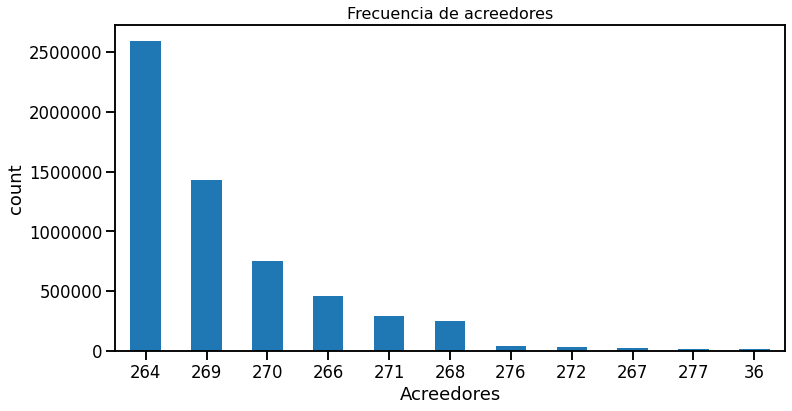

In [38]:
plt.figure(num = 1, figsize = (12,6))
df_2019_2022['obn_acreedor'].value_counts().plot(kind="bar")
plt.xticks(rotation = 0)
plt.xlabel("Acreedores")
plt.ylabel("count")
plt.title("Frecuencia de acreedores",fontsize = 16)
plt.ticklabel_format(axis="y", style="plain")

#### Cantidad de productos

In [39]:
productos = list(set(df_2019_2022.obn_producto.to_list()))
len(productos)

13

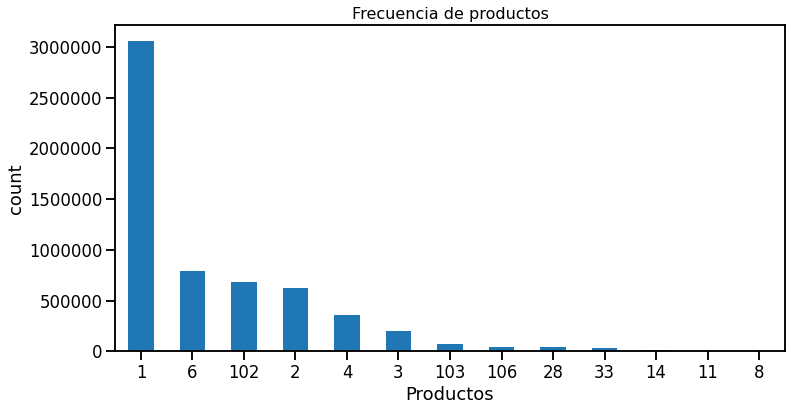

In [40]:
plt.figure(num = 1, figsize = (12,6))
df_2019_2022['obn_producto'].value_counts().plot(kind="bar")
plt.xticks(rotation = 0)
plt.xlabel("Productos")
plt.ylabel("count")
plt.title("Frecuencia de productos",fontsize = 16)
plt.ticklabel_format(axis="y", style="plain")

#### Cantidad de estudios

In [41]:
estudios = list(set(df_2019_2022.obn_estudio.to_list()))
df_2019_2022['obn_count_estudio'] = df_2019_2022['obn_estudio'].map(df_2019_2022['obn_estudio'].value_counts())

#Filtro estudios que tengan mas de 50000 obligaciones
df_filtered_estudios = df_2019_2022[df_2019_2022['obn_count_estudio']>=50000]
filtered_estudios = list(set(df_filtered_estudios.obn_estudio.to_list()))

print( f"Cantidad de estudios TOTALES = {len(estudios)}\n\
Cantidad de estudios con mas de 50000 obligaciones = {len(filtered_estudios)}")

Cantidad de estudios TOTALES = 144
Cantidad de estudios con mas de 50000 obligaciones = 17


#### Estados de obligacion posibles

In [42]:
#Al ser de tipo 'string' los datos, no se pueden limpiar solo con el set
estados = list(set(df_2019_2022.estado.to_list()))

#Creamos un nuevo arreglo para añadir los valores de forma correcta
estados_posibles = []
for estado in estados:
    estados_posibles.append(estado.rstrip())

#Filtramos ahora si con el set
estados_posibles = list(set(estados_posibles))
print(f"La cantidad de estados son {len(estados_posibles)} y se identifican como {estados_posibles}")

La cantidad de estados son 6 y se identifican como ['R', 'C', 'B', 'L', 'O', 'A']


In [43]:
#Horrible funcion, trate hacerla mas elegante pero no me funcionaba :(
def statusFixer(df_status):
    if(df_status.rstrip() == 'R' ):
        return 'R'
    elif(df_status.rstrip() == 'A' ):
        return 'A'
    elif(df_status.rstrip() == 'O' ):
        return 'O'
    elif(df_status.rstrip() == 'B' ):
        return 'B'
    elif(df_status.rstrip() == 'C' ):
        return 'C'
    elif(df_status.rstrip() == 'L' ):
        return 'L'
    else:
        return None    

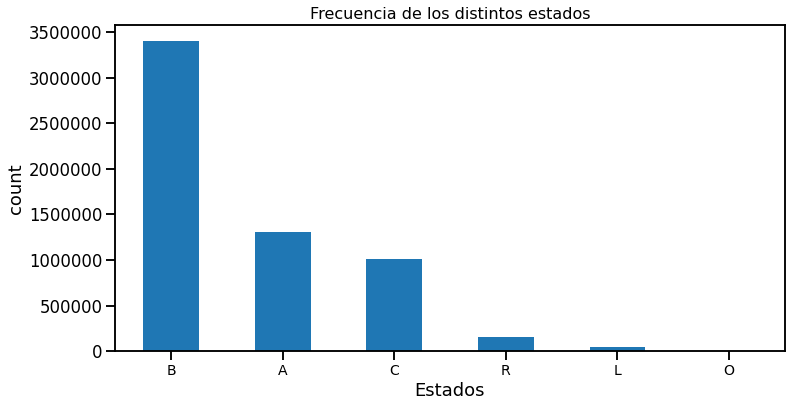

In [44]:
plt.figure(num = 1, figsize = (12,6))
df_2019_2022['estado'].apply(statusFixer).value_counts().plot(kind="bar")
plt.xticks(rotation = 0, fontsize = 14)
plt.xlabel("Estados")
plt.ylabel("count")
plt.title("Frecuencia de los distintos estados",fontsize = 16)
plt.ticklabel_format(axis="y", style="plain")

#### Relacion entre estudios y estados de obligaciones

estado            A        B       C     L     O      R
obn_estudio                                            
896           16741   158143   18064  1242   226      0
940            1029  1348926   33335  2507   207      0
971            9765   149518    6490   266   123      0
1040            196   142798  106245   450   679  25302
1041              0   143005  155237   299   955  18810
1042            153    46917   68650     0    80   6745
1051          37471      284   28809  4190     0   3972
1052          40888      138   20754  4026     0   3404
1054          28949      129   18484  1246     0   4667
1091             92        0   27366    68  2005  25064
1092         219027      455   29875  3077   107      0
1093          29150   538951   11660   384     0      0
1112         741247      476    7045  4010     0      0
1192          21615   460253   22514   683    18      0
1332              0    69223    2173     0     0      0
1333              0    48798    1202     0     0

Text(0.5, 1.0, 'Estado de gestiones de obligaciones por estudios mas representativos')

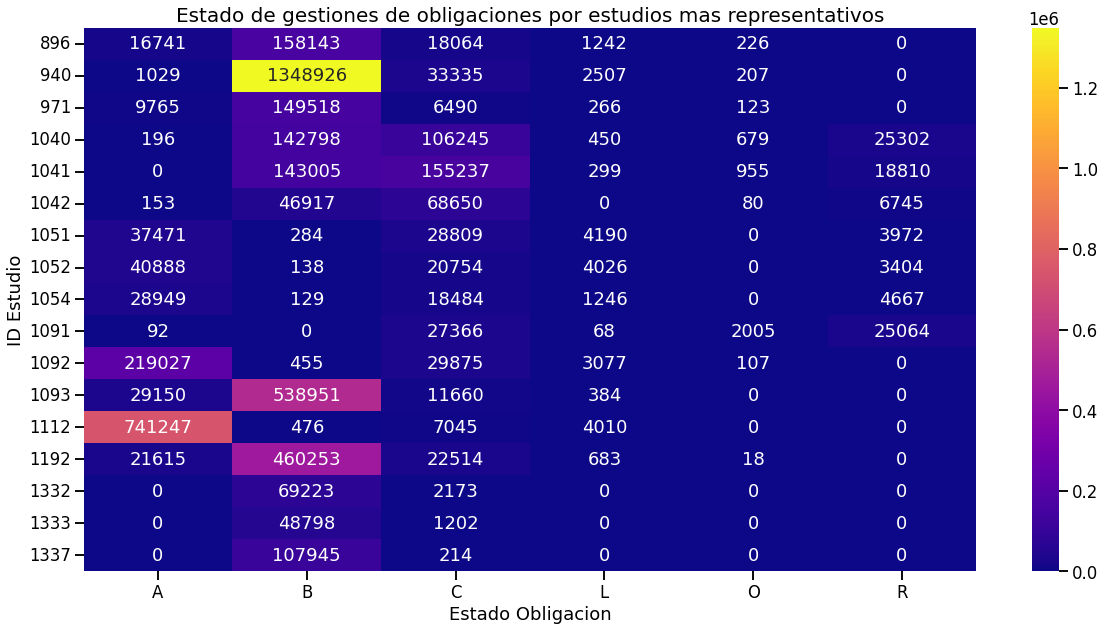

In [45]:
estado_obn_estudio = pd.crosstab(df_filtered_estudios['obn_estudio'],
                                 df_filtered_estudios['estado'].apply(statusFixer))
print(estado_obn_estudio)

plt.figure(num = 1, figsize = (20,10))
sn.heatmap(estado_obn_estudio, annot=True, fmt='d', cmap = 'plasma')
plt.xlabel('Estado Obligacion')
plt.ylabel('ID Estudio')
plt.title('Estado de gestiones de obligaciones por estudios mas representativos', fontsize=20)

# 3 Cantidades de carteras asignadas totales y por acreedor.

In [46]:
carteras = list(set(df_2019_2022.obn_cabecera.to_list()))
print(f"La cantidad de carteras TOTALES es de {(len(carteras))}.")

La cantidad de carteras TOTALES es de 694.


In [47]:
df_cartera_acreedor = df_2019_2022[['obn_acreedor', 'obn_cabecera']]

for acreedor in acreedores:
    print(f"Acreedor {acreedor}\t-->\
    {len(list((set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == acreedor].obn_cabecera.to_list()))))} carteras")
          

Acreedor 36	-->    16 carteras
Acreedor 264	-->    458 carteras
Acreedor 266	-->    453 carteras
Acreedor 267	-->    3 carteras
Acreedor 268	-->    314 carteras
Acreedor 269	-->    399 carteras
Acreedor 270	-->    5 carteras
Acreedor 271	-->    345 carteras
Acreedor 272	-->    319 carteras
Acreedor 276	-->    5 carteras
Acreedor 277	-->    3 carteras


Se ve a simple vista que las carteras por acreedor son mas que la cantidad de carteras totales, lo que sugiere que los acreedores comparten algunas de las carteras.

# 4 Maximo minimo y promedio de obligaciones por persona

In [48]:
#Elimina el Warning
pd.options.mode.chained_assignment = None 

print(f"Hay {len(obligaciones)} obligaciones y {len(personas)} personas\n")

df_prs_obn = df_2019_2022[['prs_id','obn_interno']]

df_prs_obn['obn_count'] = df_prs_obn['obn_interno'].map(df_prs_obn['obn_interno'].value_counts())


df_prs_obn = df_prs_obn.groupby('prs_id').sum().drop(columns='obn_interno')

print(f"El minimo de obligaciones por persona es de {df_prs_obn.obn_count.min()}\n\
El maximo de obligaciones por persona es de {df_prs_obn.obn_count.max()}\n\
La media de obligaciones por persona es de {round(df_prs_obn.obn_count.mean())}")

df_prs_obn.obn_count.describe()

Hay 235176 obligaciones y 184410 personas

El minimo de obligaciones por persona es de 1
El maximo de obligaciones por persona es de 173056
La media de obligaciones por persona es de 2235


count    184410.000000
mean       2234.520698
std        6166.996710
min           1.000000
25%          36.000000
50%         193.000000
75%        1369.000000
max      173056.000000
Name: obn_count, dtype: float64